Mounted at /content/drive
First five records:
       Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  \
0  1/1/2012 0:00      -1.8                -3.9           86                4   
1  1/1/2012 1:00      -1.8                -3.7           87                4   
2  1/1/2012 2:00      -1.8                -3.4           89                7   
3  1/1/2012 3:00      -1.5                -3.2           88                6   
4  1/1/2012 4:00      -1.5                -3.3           88                7   

   Visibility (km)  Stn Press (kPa)               Weather  
0              8.0           101.24                   Fog  
1              8.0           101.24                   Fog  
2              4.0           101.26  Freezing Drizzle,Fog  
3              4.0           101.27  Freezing Drizzle,Fog  
4              4.8           101.23                   Fog  

Last five records:
             Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
8779  12/31/2012 19:00  

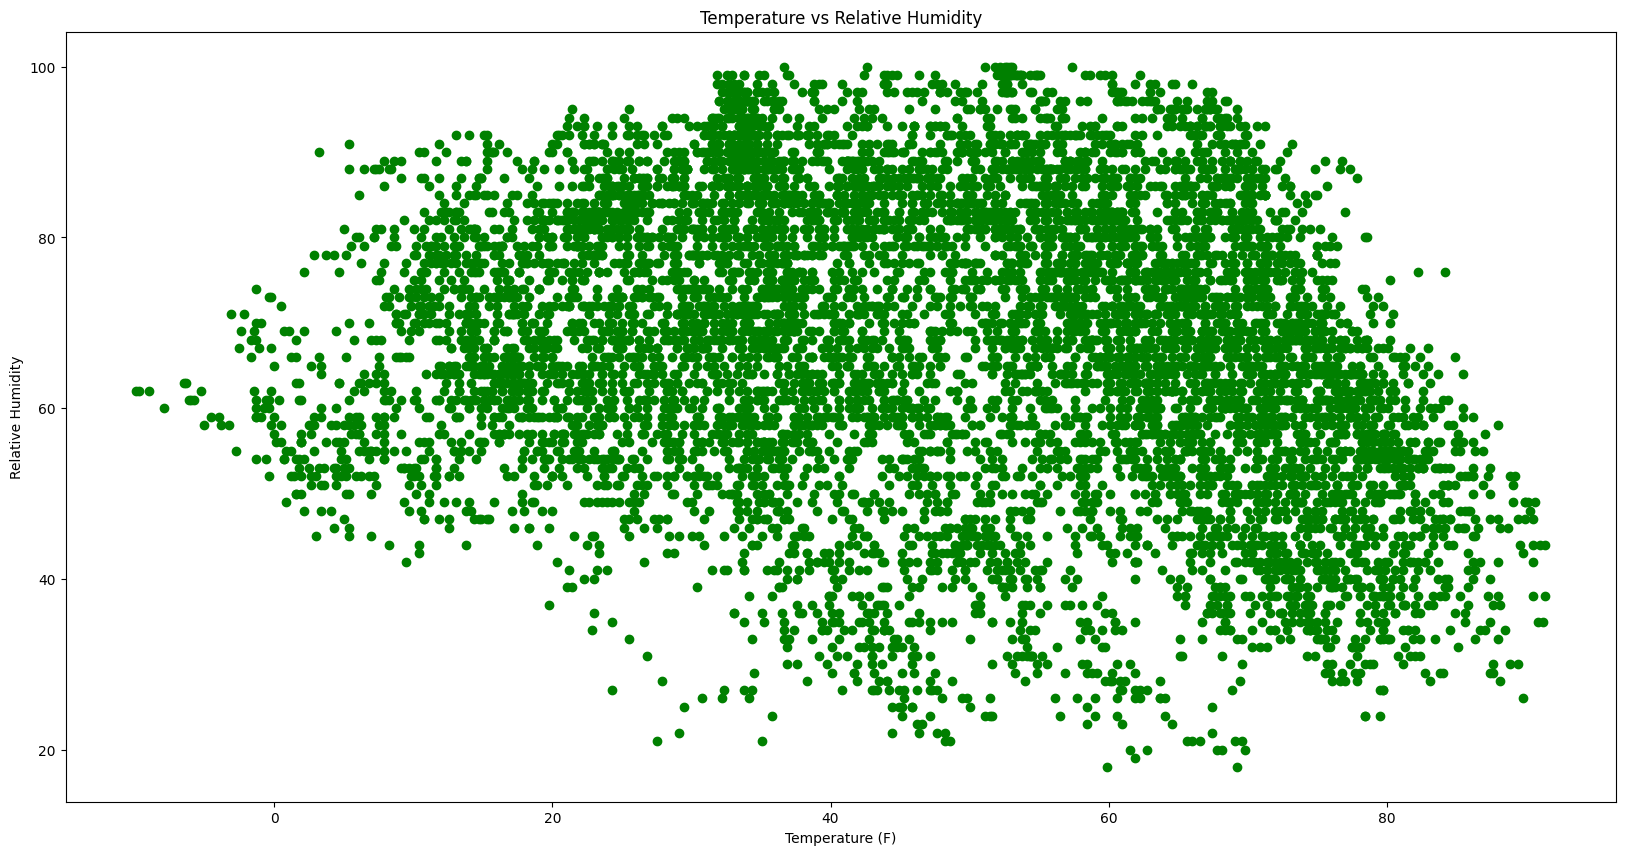

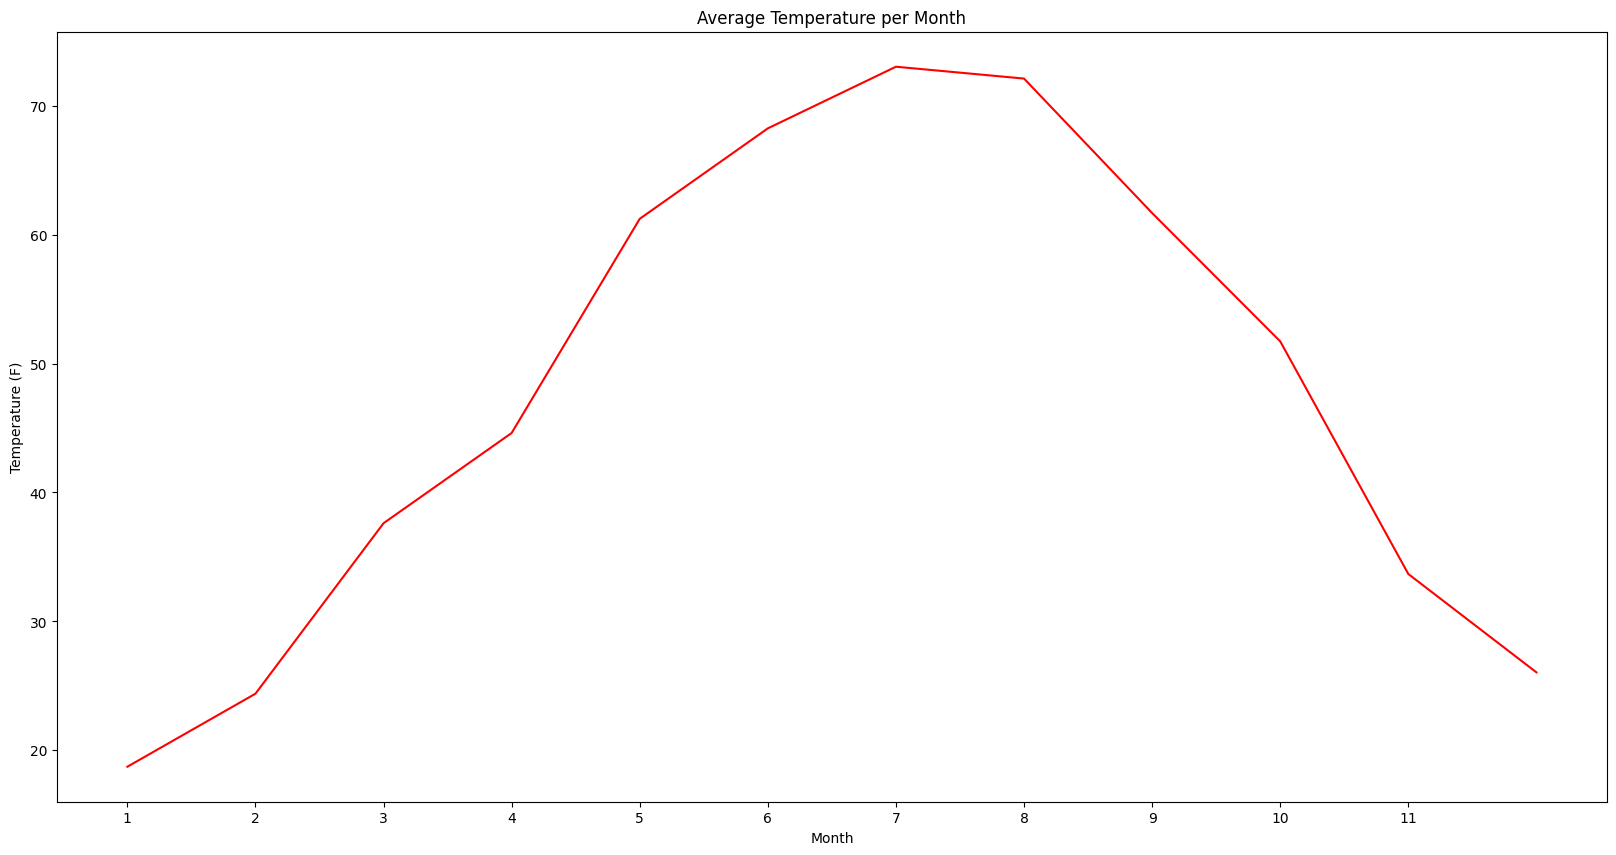

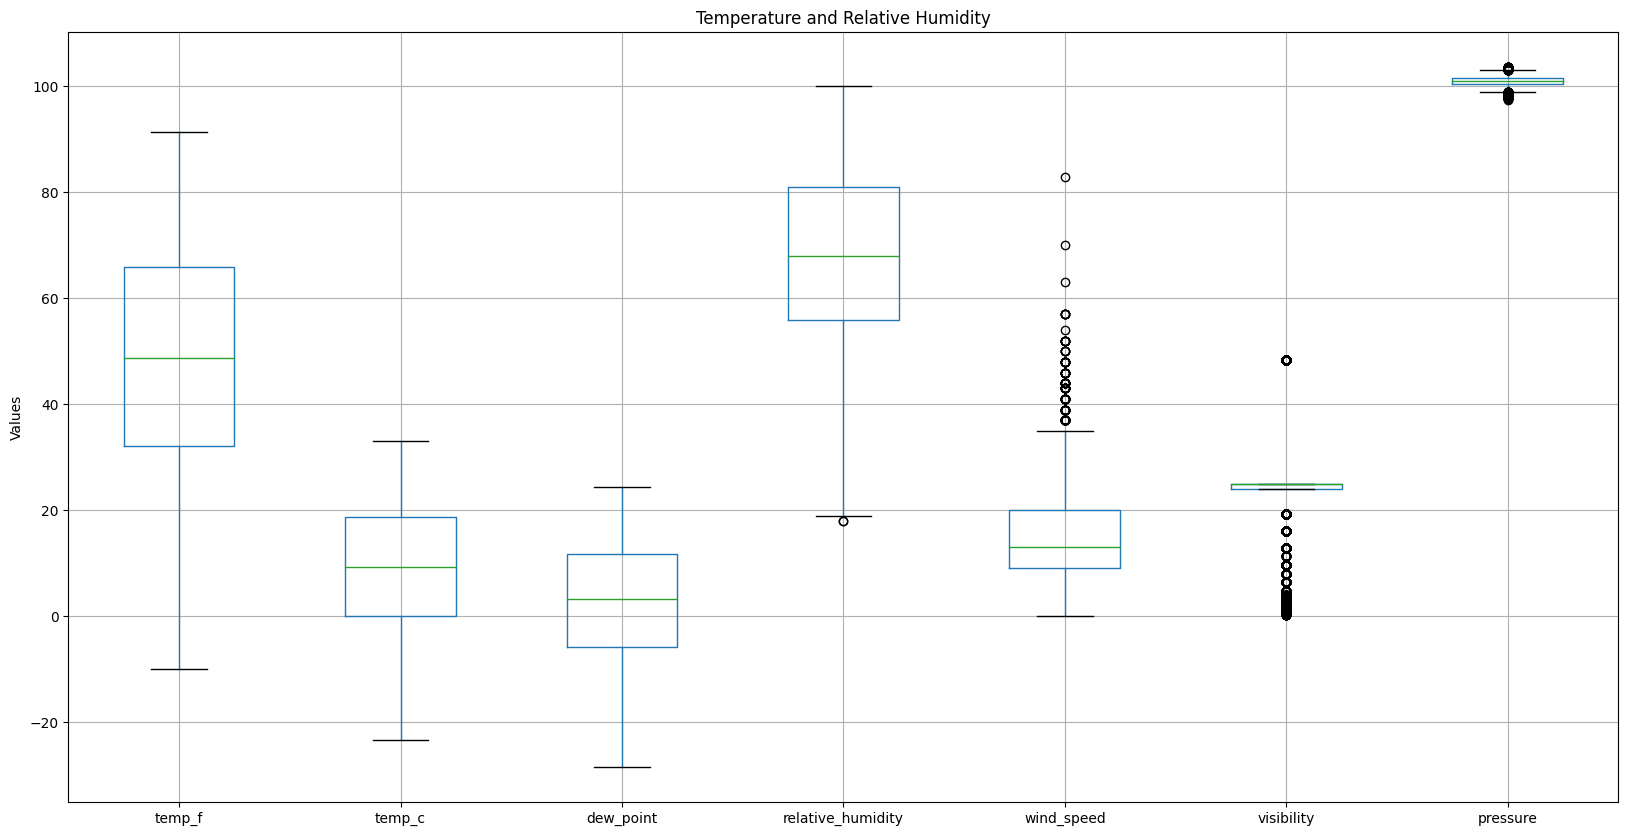

In [19]:

#MLA1_CWJ
#Machine Learning Assignment 1
#Cassidy Jackson
#CS430-ON
#Machine Learning in the Cloud

#1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

#Attach Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#3,4
#Store weather_2012.csv to df
df = pd.read_csv('/content/drive/MyDrive/weather_2012.csv')

#5.
#First five records
print("First five records:")
print(df.head())

#Last five records
print("\nLast five records:")
print(df.tail())

#Five Random Record sample
print("\nSample of five random records:")
print(df.sample(5))

#6.
#Display Column Names
print("Column names:")
print(df.columns)

#7.
#Rename Columns
column_names = {
    'Date/Time': 'date_time',
    'Temp (C)': 'temp_c',
    'Dew Point Temp (C)': 'dew_point',
    'Rel Hum (%)': 'relative_humidity',
    'Wind Spd (km/h)': 'wind_speed',
    'Visibility (km)': 'visibility',
    'Stn Press (kPa)': 'pressure',
    'Weather': 'weather'}
df.rename(columns=column_names, inplace=True)

#8.
#Print Stats
print("Standard statistics:")
print(df.describe())

#9.
#Temp from C to F
df['temp_f'] = (df['temp_c'] * 9/5) + 32

#10.
#Rearranging Columns temp_f prior to temp_c
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]

#11.
#Displaying Data Types
print("Data types:")
print(df.dtypes)

#12.
#Converting date_time to Date/Time field
df['date_time'] = pd.to_datetime(df['date_time'])
print("Conversion successful:", df['date_time'].dtype == 'datetime64[ns]')

#13.
#Average Temp/Month
monthly_avg = df.groupby(df['date_time'].dt.month)['temp_f'].mean()
print("Monthly Average Temperature:")
print(monthly_avg)

#14.
#Scatterplot of Temperature vs Relative Humidity
plot.figure(figsize=(20, 10))
plot.scatter(df['temp_f'], df['relative_humidity'], color='green')
plot.title('Temperature vs Relative Humidity')
plot.xlabel('Temperature (F)')
plot.ylabel('Relative Humidity')
plot.show()

#15
#Line Chart Average Temperature/Month (F)
plot.figure(figsize=(20, 10))
monthly_avg.plot(kind='line', color='red')
plot.title('Average Temperature per Month')
plot.xlabel('Month')
plot.ylabel('Temperature (F)')
plot.xticks(range(1, 12))
plot.show()

#16
#Box Plot - temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
plot.figure(figsize=(20, 10))
df[['temp_f','temp_c','dew_point','relative_humidity','wind_speed', 'visibility', 'pressure']].boxplot()
plot.title('Temperature and Relative Humidity')
plot.ylabel('Values')
plot.show()
